# Linearly non-separable classes

The main limitation of perceptrons was that they only worked with linearly separable classes.

A multilayer perceptron (MLP) outperforms the linear perceptron and is able to solve linearly non-separable problems.

In [1]:
import numpy as np
import sklearn.neural_network

import matplotlib.pyplot as plt
from packages.plot import plot_decision_boundary, plot_data
%matplotlib inline

## Load in the data

This is the data for the truth table of the XOR function.

In [2]:
x = np.array([[2,2],[1,3],[2,3],[5,3],[7,3],[2,4],[3,4],\
              [6,4],[1,5],[2,5],[5,5],[4,6],[6,6],[5,7]])
y = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

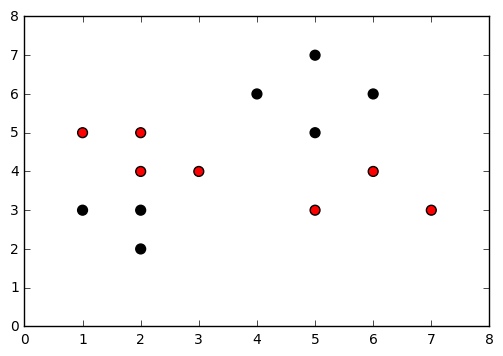

In [3]:
plot_data(x, y)
plt.axis([0,8,0,8]);

## Build the model

Create a [MLP object](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) with the following arguments:
* [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) solver (standard technique in [backpropagation](https://en.wikipedia.org/wiki/Backpropagation))
* one hidden layer with 5 neurons
* 4000 iterations maximum

The rest of the arguments are set to their default values (see documentation).

In [101]:
net = sklearn.neural_network.MLPClassifier(solver='sgd',\
                                           hidden_layer_sizes=(50,),\
                                           max_iter=4000)

## Train

The `fit` function automatically iterates until convergence or the maximum number of iterations is reached, so you only need to execute the following cell once.

In [102]:
net.fit(x,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=4000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Plot the data

The following figure displays the XOR data and the decision boundary of the MLP. This boundary is not linear anymore: it is represented in colors, so that the blue region in the plane corresponds to the features that are classified as 0's and consequently the brown region is classified as 1's.

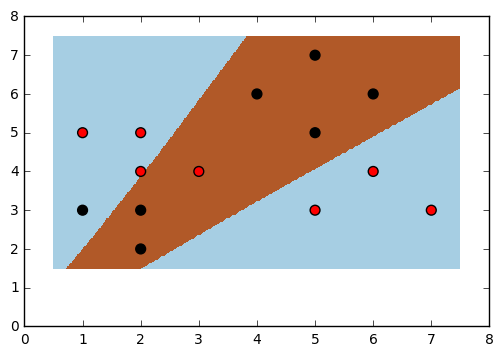

In [103]:
plot_decision_boundary(net,x,y)
plot_data(x, y)
plt.axis([0,8,0,8]);

## Analysis of the network

Percentage of correct classification of the training data:

In [104]:
net.score(x,y) * 100

85.714285714285708

Number of iterations during training:

In [105]:
net.n_iter_

1067

Loss curve: (currently, [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) supports only the [Cross-Entropy loss function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression))

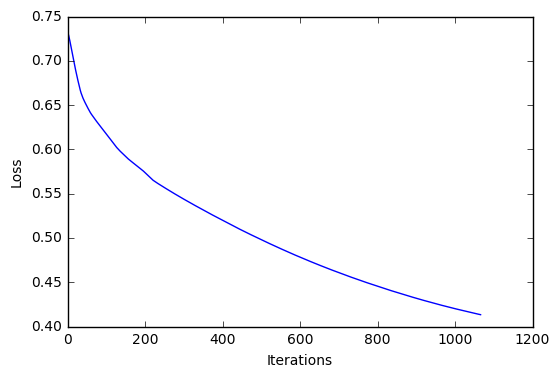

In [106]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');